# Load the LGMR data (mean of the ensemble)

In [12]:
import xarray as xr
# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('data/LGMR_SAT_climo.nc')
ds_sat.info

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
Data variables:
    sat      (age, lat, lon) float32 ...
    sat_std  (age, lat, lon) float32 ...>

# Load all 500 ensemble LGMR data

In [36]:
import xarray as xr
# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('data/LGMR_SAT_ens.nc')
ds_sat.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120, nEns: 500)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
  * nEns     (nEns) float32 1.0 2.0 3.0 4.0 5.0 ... 497.0 498.0 499.0 500.0
Data variables:
    sat      (nEns, age, lat, lon) float32 ...>

# Load the WAIS d18O data

In [34]:
import pandas as pd

# Load the specified sheet from the Excel file
file_path = 'data/Buizert C et al.-2018-Nature-Abrupt ice-age shifts in southern westerly winds and Antarctic climate forced from the north.xlsx'
sheet_name = '(9) Isotopes all'

# Read the data from the sheet
df_wais_d18o = pd.read_excel(file_path, sheet_name=sheet_name,skiprows=63)
# extract the second and third columns
df_wais_d18o = df_wais_d18o.iloc[:,1:3]
# delete the first row
df_wais_d18o = df_wais_d18o.iloc[1:]
df_wais_d18o
# # convert to ndarray
# wais_d18o = df_isotopes.values
# wais_d18o

,Age,d18O
1,-55.60122,-32.3263
2,-53.253362,-34.9809
3,-50.979269,-34.2941
4,-48.975223,-32.9244
5,-46.601404,-34.9492
...,...,...
6369,67518.290349,-40.3572
6370,67557.094262,-40.9227
6371,67612.367471,-41.432
6372,67667.620836,-41.3889


Nearest latitude: -78.63, nearest longitude: 247.50


TypeError: unsupported format string passed to tuple.__format__

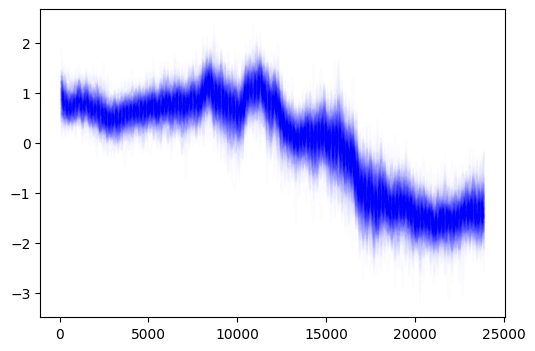

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore


window_size = 20

# Given coordinates
wais_lat, wais_lon = -79.473695, -112.067194

# The function below finds the index of the point closest to the given coordinates
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

# Find the nearest latitude and longitude
lat_idx, nearest_lat = find_nearest(ds_sat['lat'].values, wais_lat)
lon_idx, nearest_lon = find_nearest(ds_sat['lon'].values, wais_lon+360)  # Ensure the longitude is within the dataset bounds

print(f'Nearest latitude: {nearest_lat:.2f}, nearest longitude: {nearest_lon:.2f}')

# Calculate the rolling window with centering
df_wais_d18o['d18O_smoothed'] = df_wais_d18o['d18O'].rolling(window=window_size, center=True).mean()


# Now we plot the data
plt.figure(figsize=(6, 4))
for i in range(500):
    plt.plot(ds_sat['age'],zscore(ds_sat['sat'].isel(nEns=i).isel(lat=lat_idx, lon=lat_idx)), color='blue', alpha=0.01)
# plot the mean of sat
plt.plot(ds_sat['age'],zscore(ds_sat['sat'].mean(dim='nEns').isel(lat=lat_idx, lon=lat_idx)), color='blue', alpha=1,label=f'LGMR {nearest_lat:.2f}, {nearest_lon-360,:.2f}')
# plt.plot(sat_timeseries['age'], sat_timeseries, label=f'LGMR {nearest_lat:.2f}, {nearest_lon:.2f}')
plt.plot(df_wais_d18o['Age'], zscore(df_wais_d18o['d18O']), alpha=0.3)  # Original data with reduced opacity
plt.plot(df_wais_d18o['Age'], zscore(df_wais_d18o['d18O_smoothed']), color='orange',label=f'WDC δ18O{wais_lat:.2f}, {wais_lon:.2f}')  # Smoothed curve

# Set x-axis limits
plt.xlim(0, 23900)

# Invert the x-axis
plt.gca().invert_xaxis()

# Add the legend
plt.legend()

# Set labels
plt.xlabel('Age (yr BP)')
plt.ylabel('SAT')

# Add grid
plt.grid(True)

# Show the plot
plt.show()